In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_raw = pd.read_csv(r'C:\Users\shash\Downloads\archive (2)\IPIP-FFM-data-8Nov2018\data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [3]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481
Number of participants after eliminating missing values:  1013481


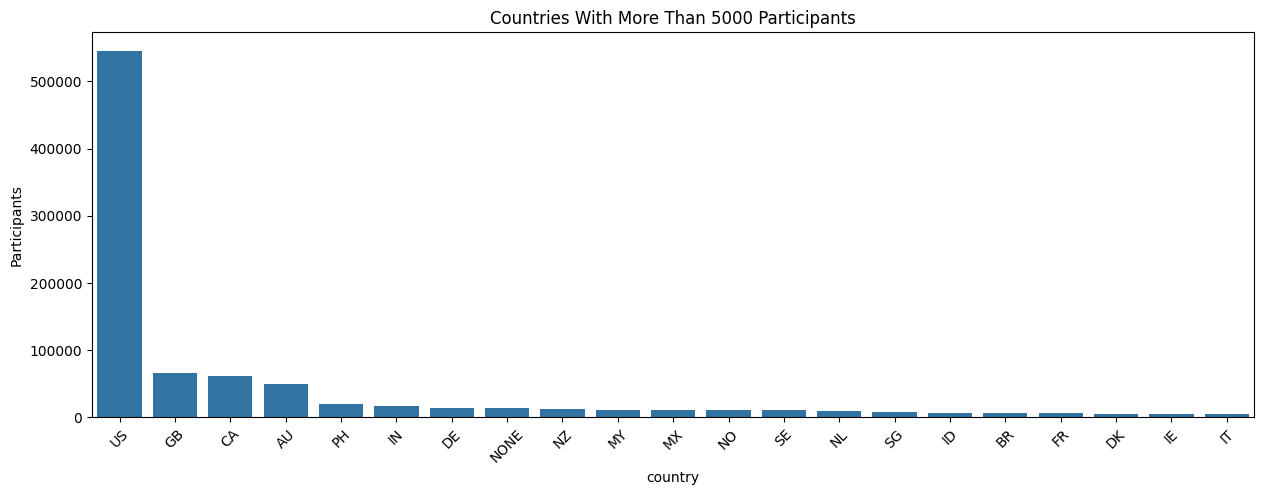

In [4]:
# Participants' nationality distriution
countries = data['country'].value_counts().reset_index()
countries.columns = ['country', 'count']
countries_5000 = countries[countries['count'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x='country', y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [6]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


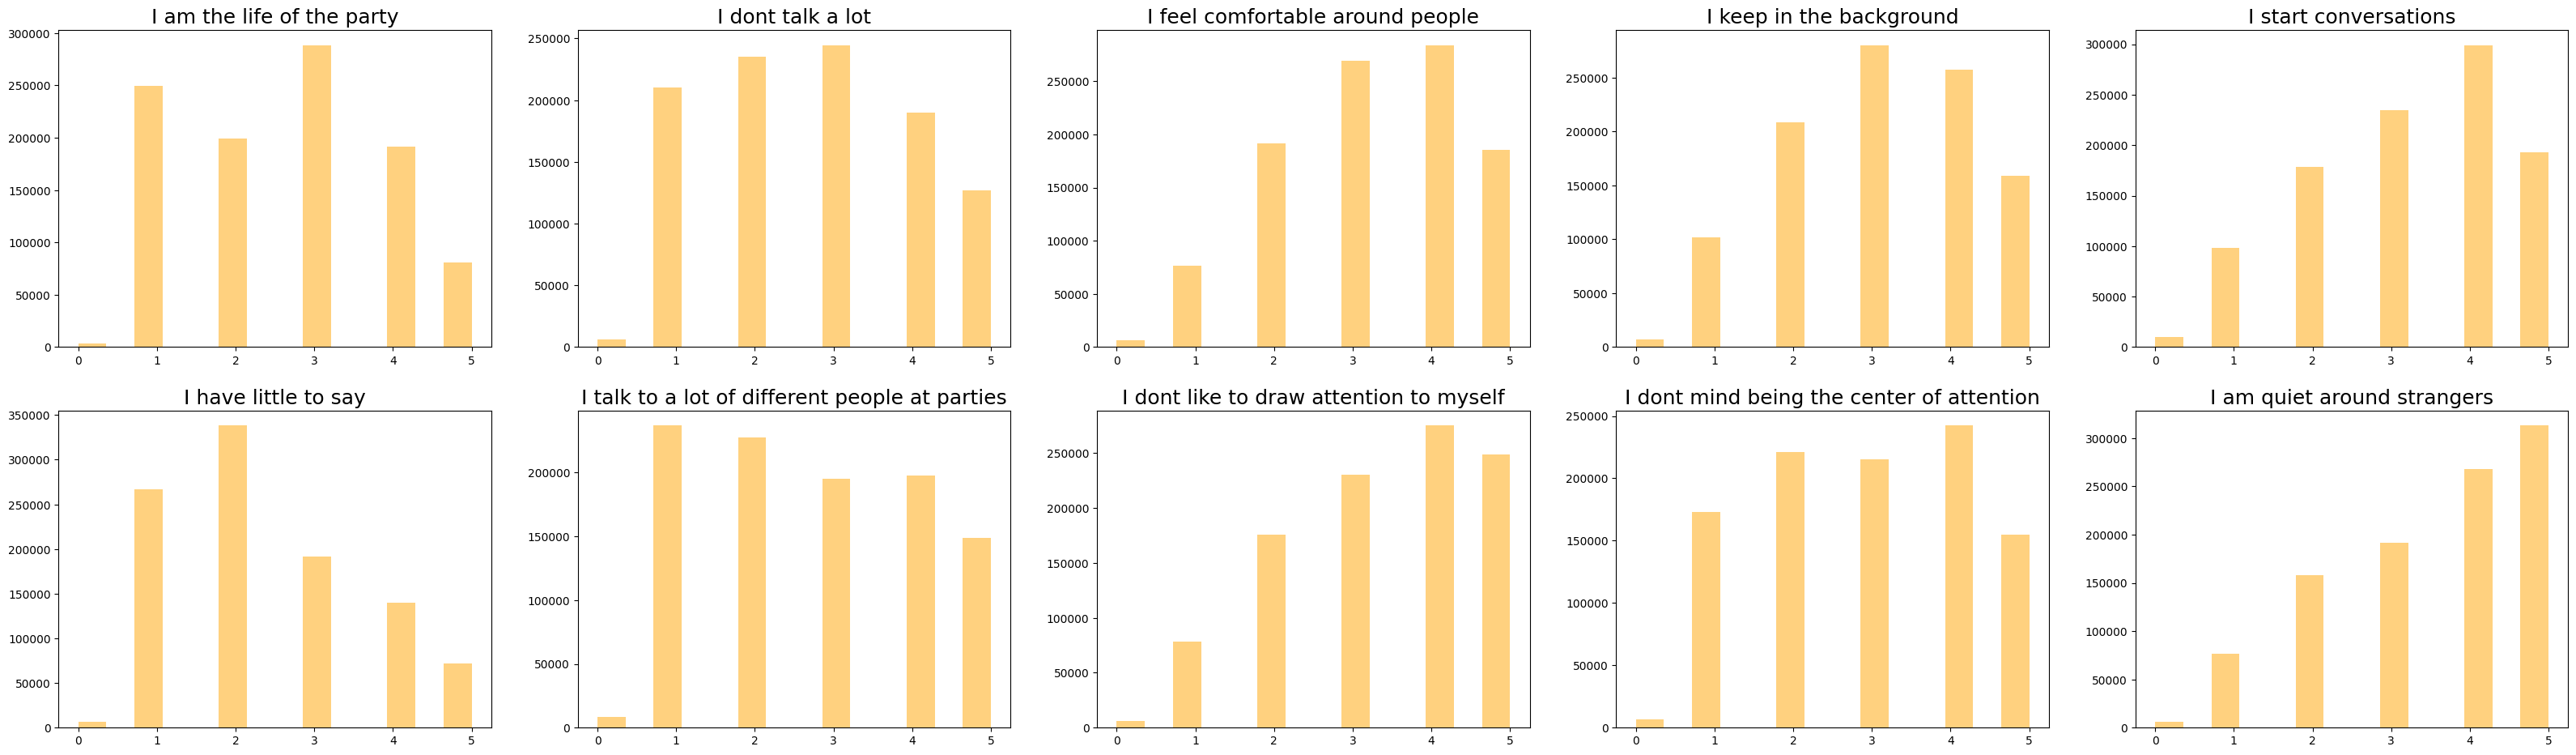

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


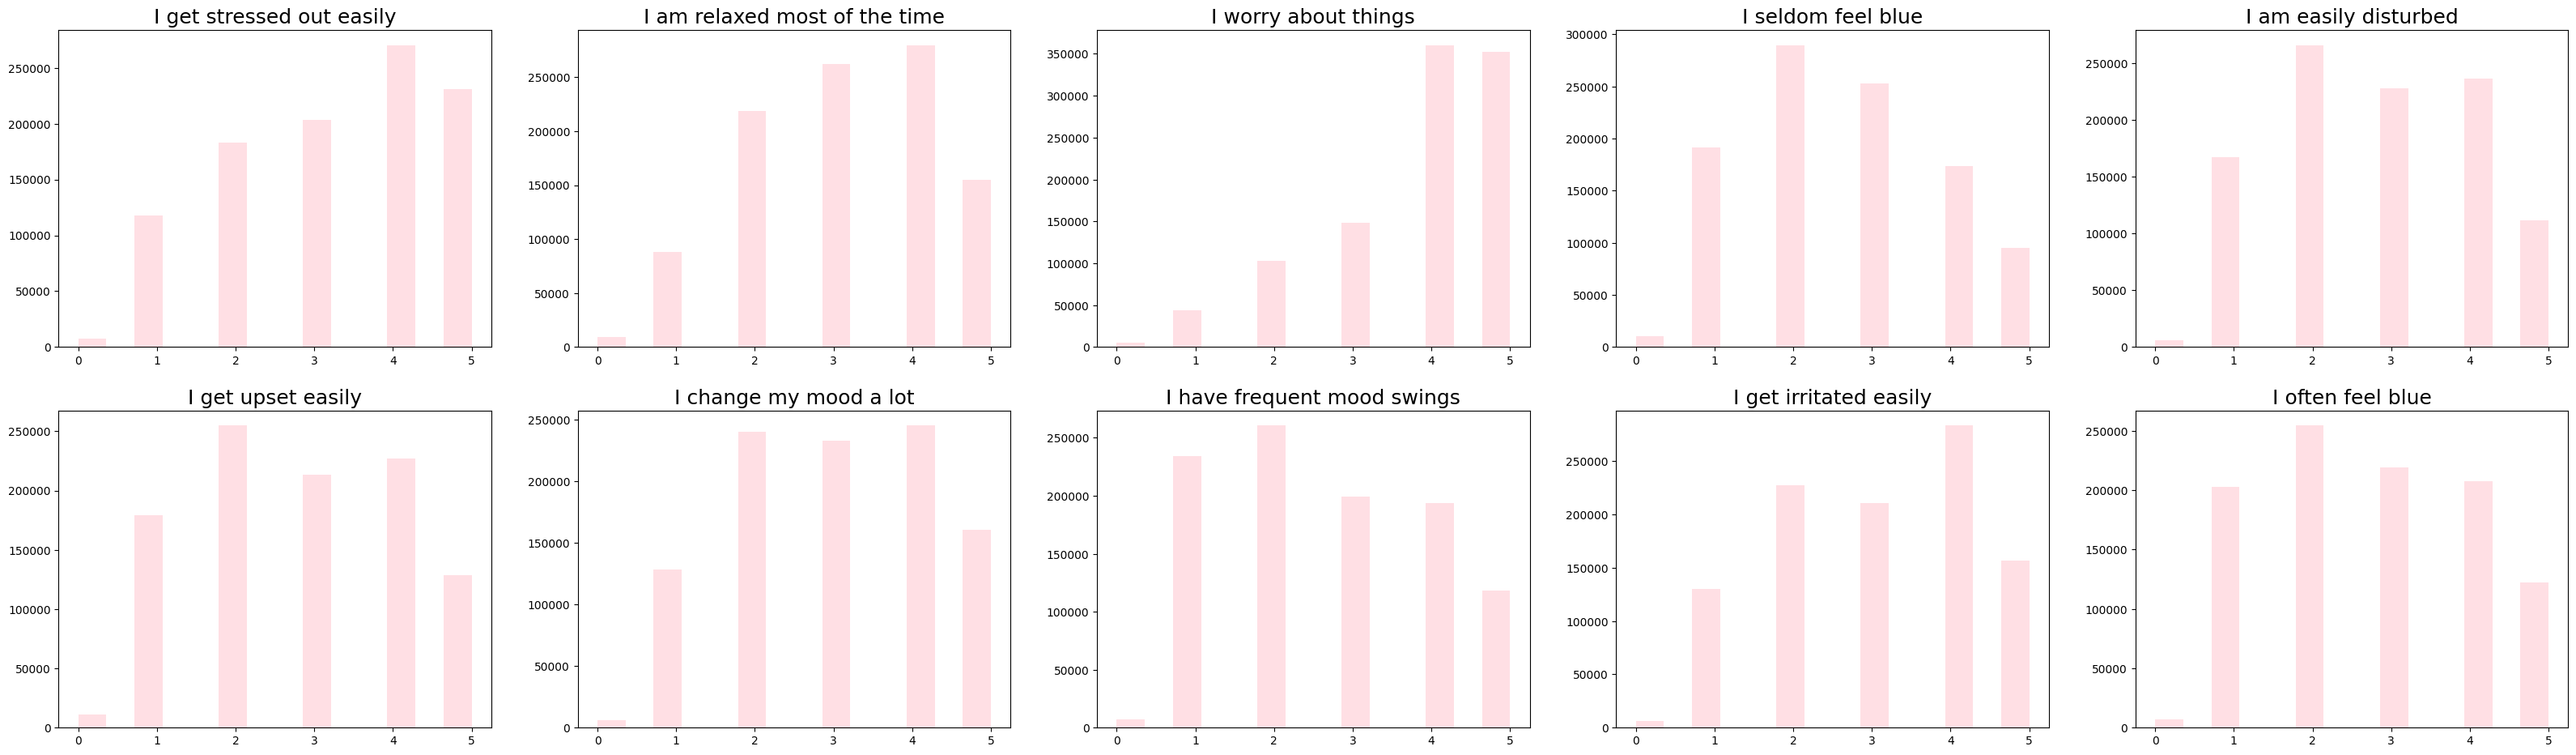

In [8]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


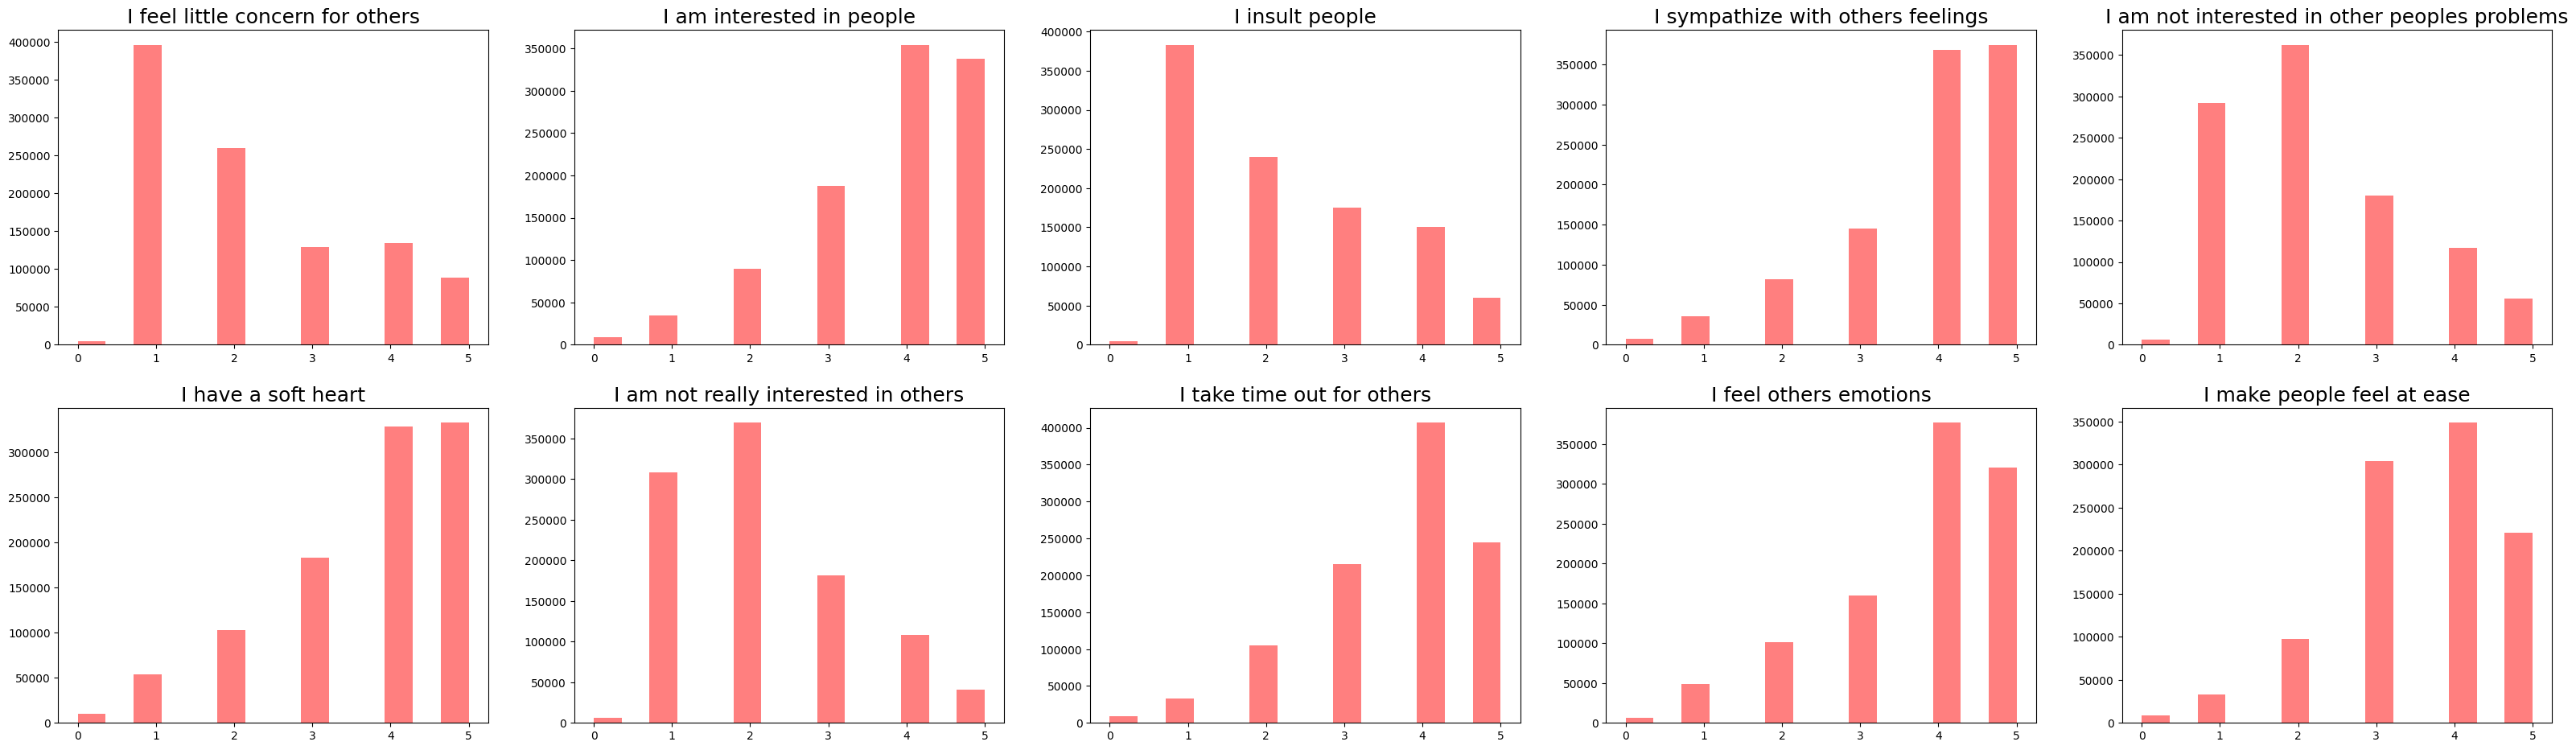

In [9]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


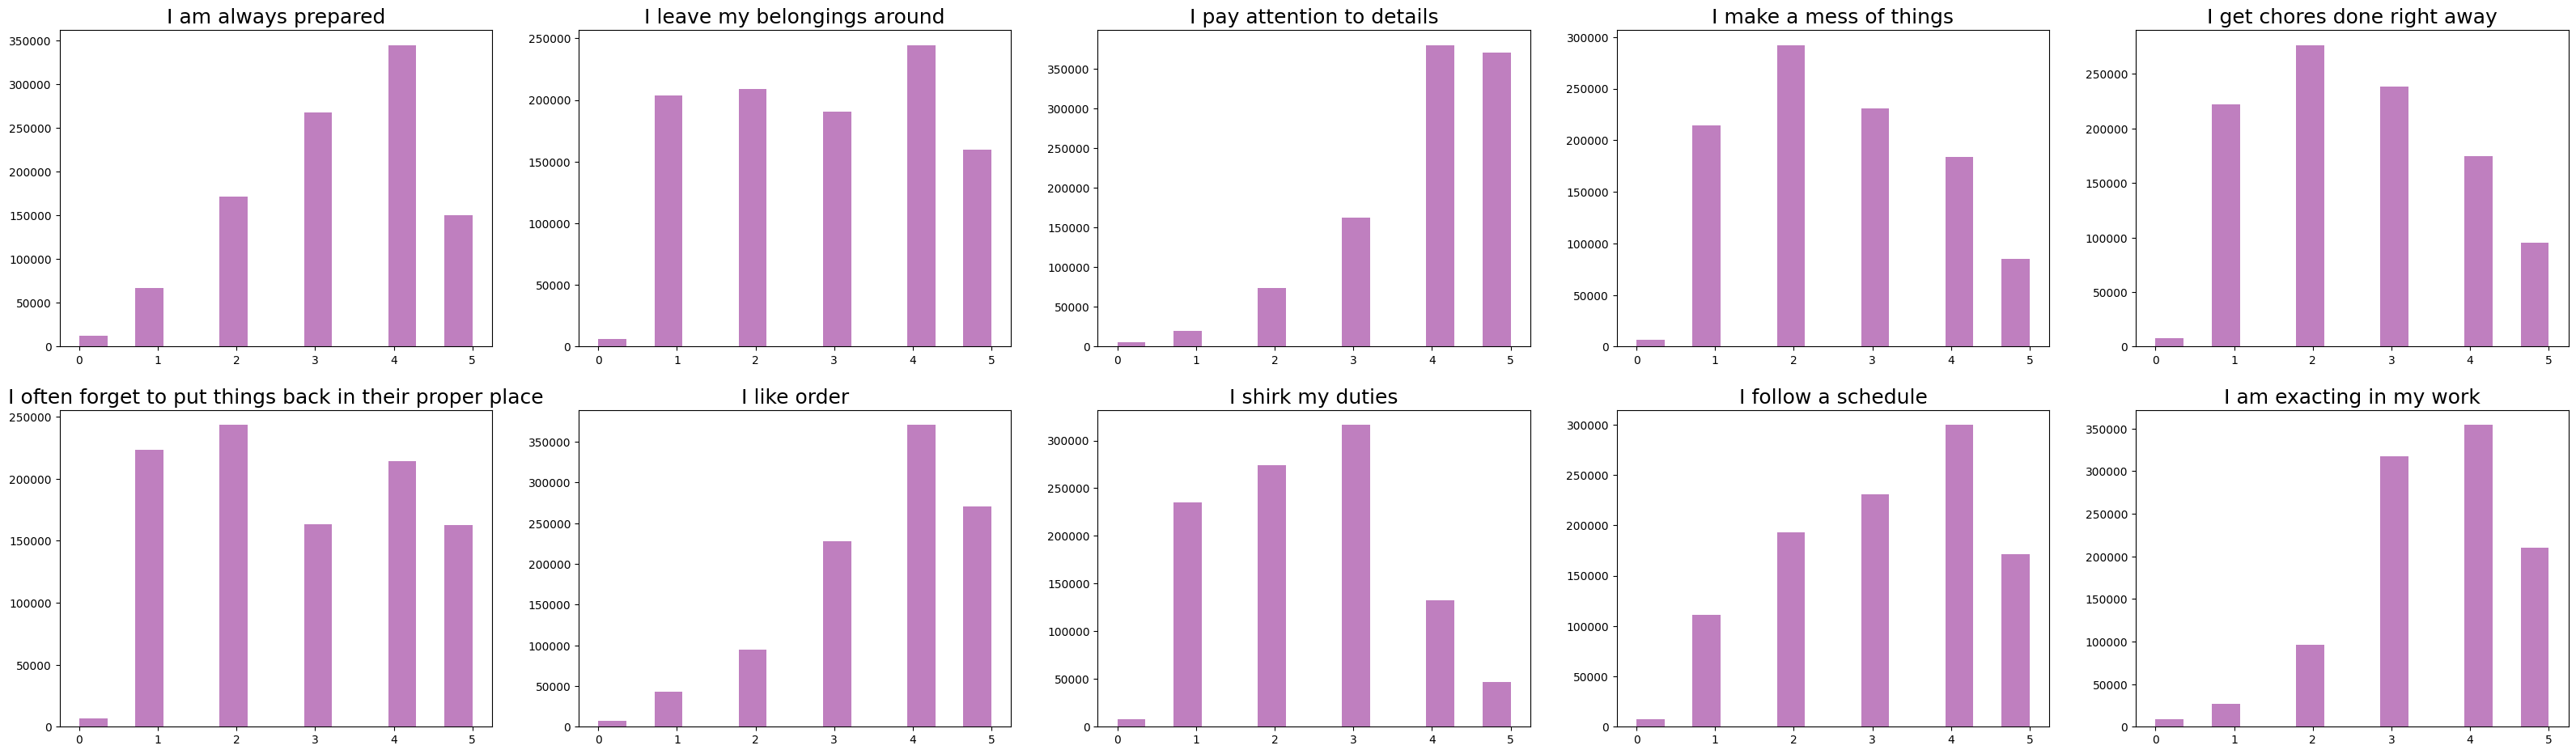

In [10]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


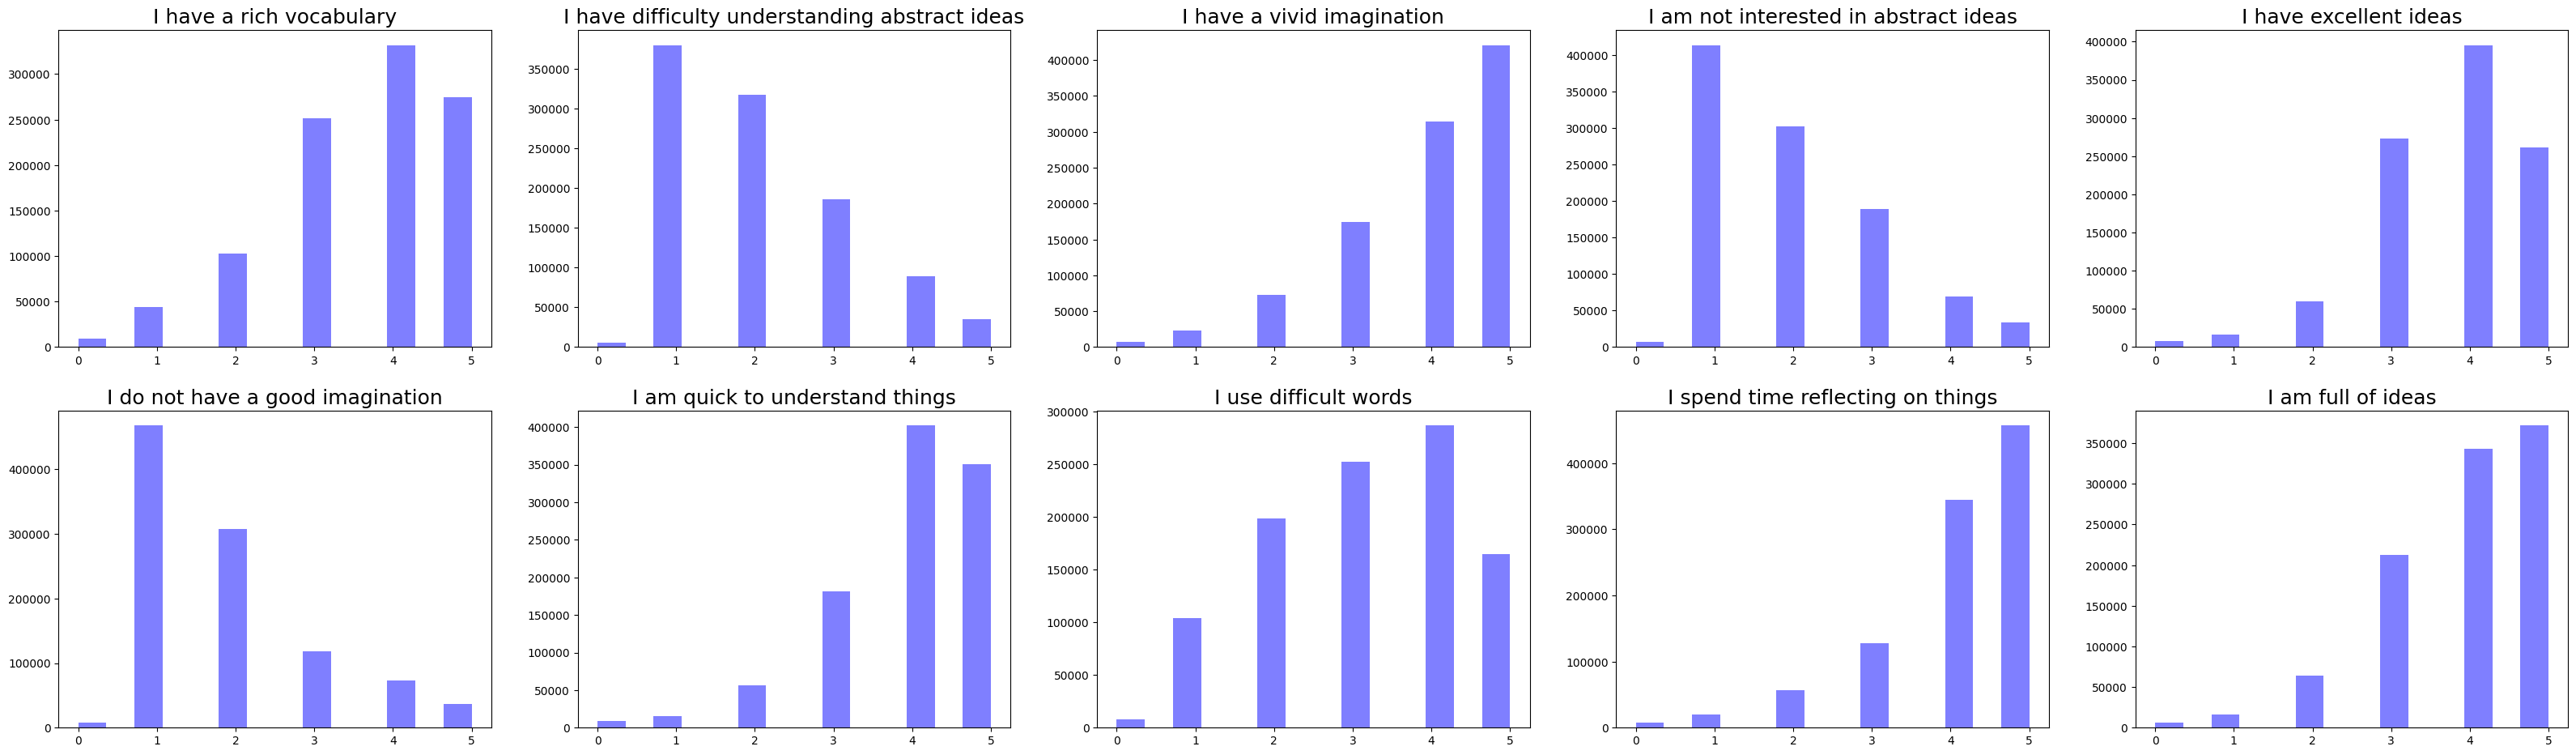

In [11]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [12]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [13]:
pip install yellowbrick

In [14]:
import sklearn
import yellowbrick

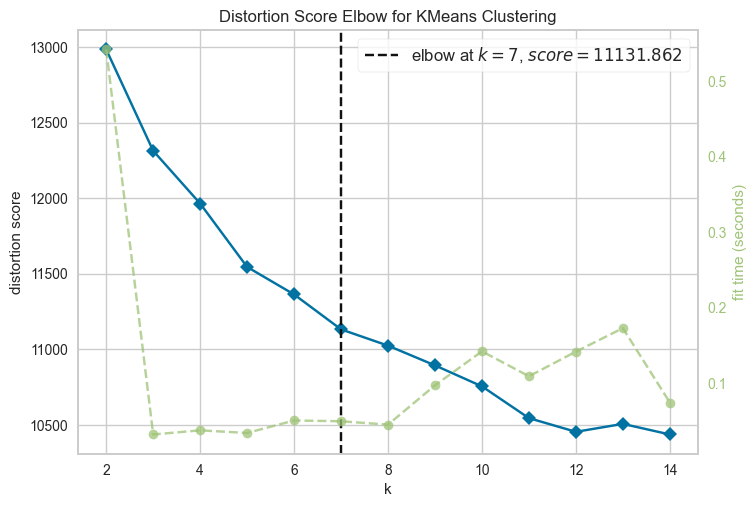

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [16]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [17]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,3
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,2


In [18]:
df_model.Clusters.value_counts()

Clusters
0    226027
3    211742
2    211344
1    198172
4    166196
Name: count, dtype: int64

In [19]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.456631,1.910378,3.797931,2.498839,4.044694,1.828494,3.659395,2.761356,3.770970,2.993713,3.797874,2.936932,4.233786,2.418269,3.279785,3.454340,3.797038,3.445168,3.646679,3.163401,2.162458,4.272352,2.659589,4.177793,2.004548,3.991510,1.858437,3.893973,4.125750,3.844368,2.949891,3.615046,3.836099,3.240737,2.227676,3.532379,3.450256,2.831471,2.937202,3.474970,3.739651,2.114854,4.247227,1.965424,3.957961,1.771010,3.962681,3.375614,4.185345,4.202595
1,1.813667,3.624528,2.230502,4.050648,2.283123,3.194321,1.746326,4.061992,2.184653,4.470919,4.243935,2.464253,4.498400,2.147932,3.556209,3.856175,3.989761,3.760567,4.007009,3.931721,2.512121,3.324874,2.619795,3.791424,2.596734,3.811830,2.751367,3.398290,3.632678,3.038986,2.789042,3.374649,3.803055,3.493521,2.076514,3.521693,3.546651,3.059433,2.758321,3.297948,3.499611,2.383364,4.062062,2.138839,3.431665,2.089811,3.674732,3.180389,4.271396,3.721984
2,3.458788,1.957879,4.332340,2.232753,4.254864,1.674786,3.872530,2.823099,3.728694,2.529866,2.323246,3.820813,3.158065,3.283008,2.112546,1.898171,2.106722,1.673542,2.113616,1.718478,1.891187,4.429560,1.822616,4.250369,1.855960,3.851399,1.588784,4.099326,4.103031,4.194025,3.724459,2.566541,4.197441,1.888211,3.149505,2.266953,3.878042,1.929215,3.590502,3.878653,3.881951,1.756407,4.079032,1.796810,4.155301,1.656532,4.313522,3.229829,4.097959,4.290962
3,2.120940,3.301390,3.076267,3.668191,2.953694,2.706889,2.199370,4.003457,2.320565,4.140071,3.549537,3.045844,4.182496,2.583446,2.852405,2.836117,2.914023,2.478464,3.016355,2.750182,1.884024,3.934359,1.700673,4.355673,1.985497,4.152247,2.018881,3.982502,4.180555,3.715635,3.835219,2.230172,4.300592,2.033479,3.237397,2.079946,4.171794,2.022924,3.837349,3.893937,3.577316,2.142806,3.903090,2.063861,3.727125,1.965094,4.007070,2.992231,4.273555,3.816909
4,2.184174,3.294766,2.799478,3.410329,2.586296,2.767931,2.116724,3.534201,2.641670,3.793292,2.335983,3.629004,2.989573,2.927549,2.315946,2.002377,2.288629,1.908710,2.565639,2.233399,3.011498,2.942189,2.556066,2.793340,3.135515,2.664125,2.989356,2.863619,2.619973,2.987166,3.151526,2.823726,3.672934,2.399095,2.377253,2.732689,3.383914,2.504122,2.779832,3.343955,3.533244,1.977593,3.613077,2.057871,3.622019,2.042979,3.886832,3.104280,3.701172,3.665780


In [20]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.072240,3.417327,3.299078,3.209573,3.352236
1,2.966068,3.645596,3.147810,3.172083,3.245385
2,3.086560,2.420821,3.208626,3.106952,3.325830
3,3.049083,3.020887,3.191005,3.164281,3.246906
4,2.912886,2.519681,2.856285,2.916905,3.120485


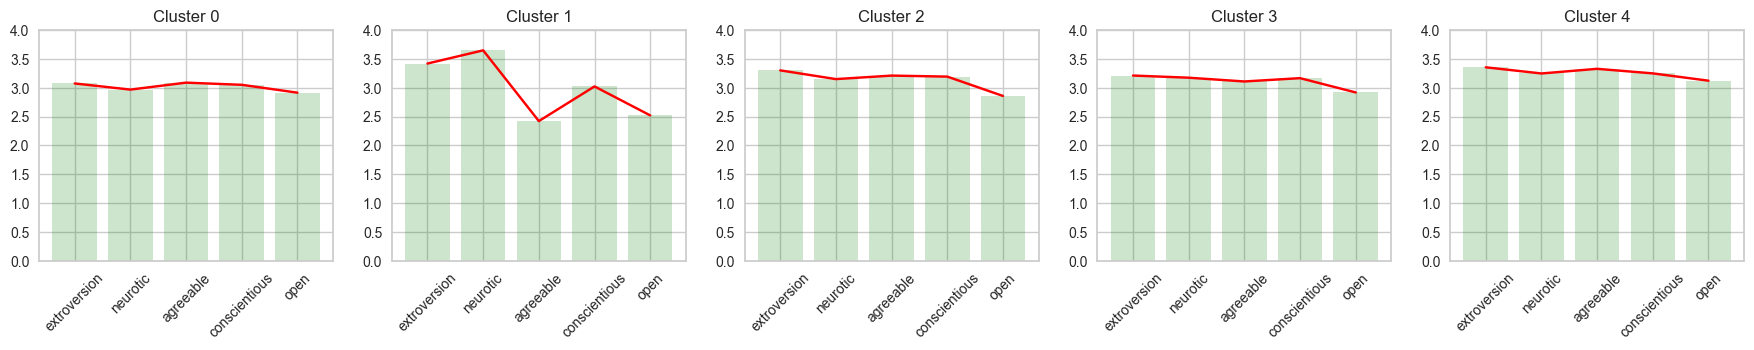

In [21]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [22]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,5.373238,-1.725486,2
1,-0.071410,3.345231,3
2,0.765327,2.422310,3
3,-1.015890,1.003737,4
4,4.805658,2.255399,2


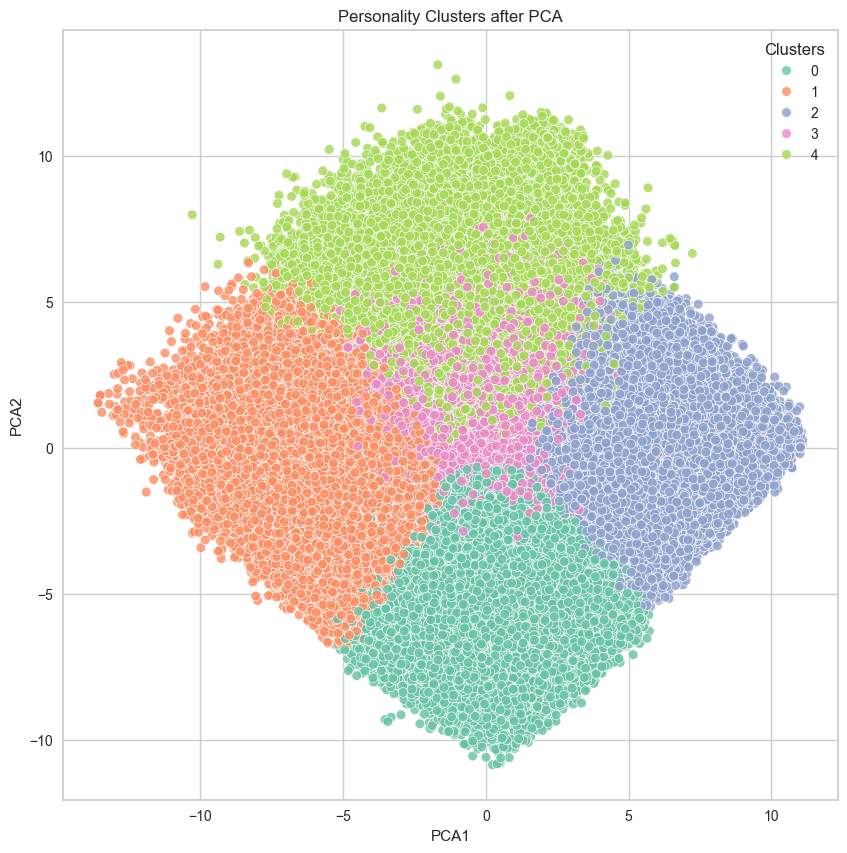

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [24]:
!pip install openpyxl

In [25]:
my_data = pd.read_excel(r"C:\Users\shash\Downloads\personality_test_responses.xlsx")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,1,5,4,5,5,4,2,4,2,2,3,1,4,5,3,1,1,5,2,4,1,4,1,2,2,4,4,2,5,4,5,5,4,4,3,5,5,2,2,3,5,5,1,1,4,4,2,5,4
1,5,2,4,3,4,1,2,2,4,5,5,2,2,2,5,2,4,4,5,4,4,5,1,4,1,2,5,1,5,4,4,2,5,2,3,4,2,2,2,2,1,3,4,1,4,4,3,1,1,5
2,5,4,5,4,5,2,4,5,3,1,5,3,2,5,5,3,1,1,5,3,5,4,5,1,2,4,5,2,3,3,4,4,4,4,2,1,5,3,2,5,1,5,3,4,1,5,5,5,3,4
3,5,2,3,1,3,5,3,2,2,4,1,5,2,3,3,1,1,1,3,3,5,4,5,5,3,2,3,4,5,2,5,1,4,4,3,5,1,3,1,1,2,2,1,2,5,5,1,3,2,4
4,5,2,4,5,5,2,3,5,2,1,1,1,5,5,1,5,1,3,3,2,5,2,3,3,1,3,2,3,2,3,3,4,1,2,2,3,4,5,3,2,5,5,3,5,2,3,3,2,3,1
5,1,3,2,2,4,3,5,4,3,2,5,3,4,2,2,3,2,3,1,2,5,1,3,3,2,1,4,2,5,5,5,5,3,2,1,2,2,1,4,4,4,4,5,1,3,5,5,1,3,2
6,4,2,3,4,3,1,5,2,4,1,2,3,1,5,4,3,3,3,1,4,1,5,1,4,1,1,4,3,1,3,3,5,3,1,3,2,5,5,1,5,2,2,4,2,4,5,5,2,5,3
7,2,1,4,2,3,1,3,4,2,4,1,5,2,5,5,3,4,4,3,3,1,3,3,4,1,1,3,2,4,2,3,2,4,5,3,2,4,3,2,4,5,5,3,5,4,5,1,2,5,5
8,2,5,3,1,1,1,2,3,3,5,2,5,1,3,1,1,2,5,1,5,5,3,5,3,5,5,2,2,2,4,2,4,2,4,3,4,2,5,2,2,4,1,3,1,2,3,1,1,1,5
9,3,5,2,4,4,3,5,3,5,3,4,1,3,5,3,3,1,1,1,4,2,3,2,2,3,5,1,5,3,4,4,5,5,3,4,5,1,4,4,2,1,4,3,3,3,2,2,3,4,5


In [26]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [4 0 4 4 4 4 2 4 4 0]


In [27]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.3,2.7,2.9,3.9,3.4,4
1,3.2,3.5,3.2,2.8,2.7,0
2,3.8,3.3,3.4,3.4,3.6,4
3,3.0,2.3,3.8,2.8,2.7,4
4,3.4,2.7,2.7,2.9,3.2,4
5,2.9,2.7,3.1,2.9,3.3,4
6,2.9,2.9,2.4,3.3,3.4,2
7,2.6,3.5,2.4,3.2,4.0,4
8,2.6,2.6,3.6,3.0,2.2,4
9,3.7,2.6,3.0,3.7,3.0,0


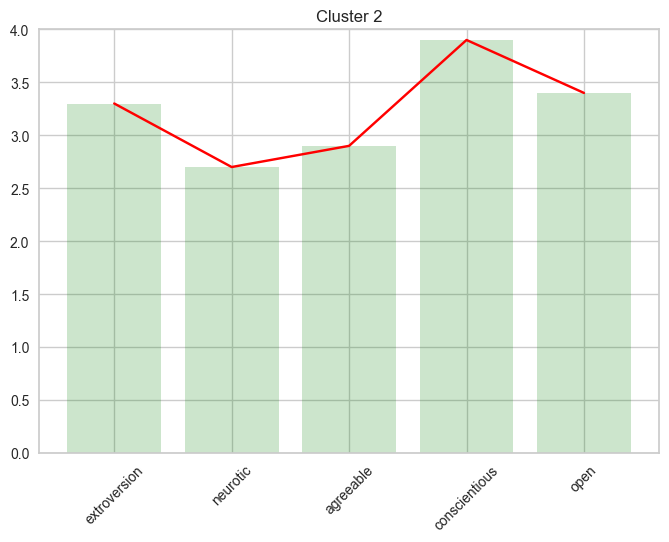

In [28]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);

In [29]:
import joblib
# Save the trained KMeans model for use in the Flask app
joblib.dump(k_fit, 'kmeans_model.joblib')

['kmeans_model.joblib']